In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import oneway as oneway

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [3]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

F Calculated in manual calculation was 22.24

Numerator df = 2

Denominator df = 15

We can find p-value, as the area to the right of 22.24

In [4]:
stats.f.sf(22.2645, 2, 15)

3.237576504411197e-05

In [5]:
oneway.anova_oneway((m1, m2, m3), use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = [151.         150.83333333 155.5       ]
nobs = [6. 6. 6.]
vars_ = [0.8        3.76666667 1.1       ]
use_var = equal
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

Now Compare P-Value with Alpha i.e 0.05.

- We notice that P-value < Alpha, Therefore **REJECT** H0.

<br>
_____________________________________________________________________________________________________________________________

# Comparing cars mpg from three countries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [7]:
mpg = sns.load_dataset("mpg")

In [8]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg.groupby('origin').mean()['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [10]:
mpg.groupby(by=['origin', 'cylinders']).mean()

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

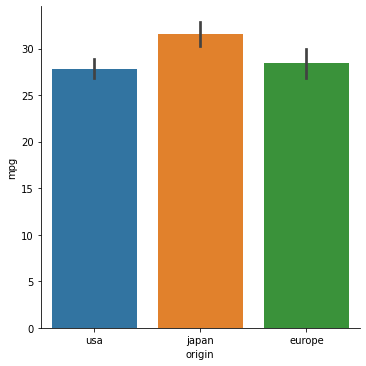

In [11]:
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg'], kind='bar')

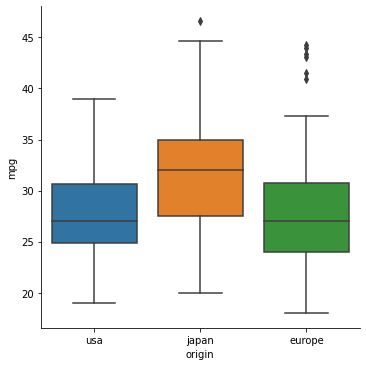

In [12]:
sns.catplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg'], kind='box')

In [13]:
eu = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'europe')]['mpg']
jp = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'japan')]['mpg']
us = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'usa')]['mpg']

In [14]:
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

Now Compare P-Value with Alpha i.e 0.05.

- We notice that P-value < Alpha, Therefore **REJECT** H0.

<br>
_____________________________________________________________________________________________________________________________

# CHECKING WHERE THE DIFFERENCE OCCURE

# Post Hoc Test

Post Hoc Test attempt to control the experimentwise error rate (usually alpha=0.05) just like one way ANOVA is used instead of multiple t-tests.

One Popular Test is Turkey's Test. Other test includes:

In [16]:
import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [18]:
df = mpg[mpg['cylinders'] == 4][['mpg', 'origin']]
df.head()

,mpg,origin
14,24.0,japan
18,27.0,japan
19,26.0,europe
20,25.0,europe
21,24.0,europe


In [19]:
result = pairwise_tukeyhsd(df['mpg'], df['origin'], alpha=0.05)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9266  5.4425   True
europe    usa  -0.5708 0.7995 -2.8062  1.6646  False
 japan    usa  -3.7554  0.001 -5.9383 -1.5724   True
----------------------------------------------------


**CONCLUSION:**

- europe & japan : p-adj = 0.003 which is smaller than 0.05 (REJECT H0)
            
            (Which means there is a difference in average MPG between europe & japan)


- japan & usa : p-adj = 0.001 which is smaller than 0.05 (REJECT H0)

            (Which means there is a difference in average MPG between japan & usa)

_______________

In [22]:
m13 = pd.concat([
    pd.DataFrame(data = {'Volume':m1, 'Machine':'Machine1'}),
    pd.DataFrame(data = {'Volume':m2, 'Machine':'Machine2'}),
    pd.DataFrame(data = {'Volume':m3, 'Machine':'Machine3'})
])

In [23]:
m13

,Volume,Machine
0,150,Machine1
1,151,Machine1
2,152,Machine1
3,152,Machine1
4,151,Machine1
5,150,Machine1
0,153,Machine2
1,152,Machine2
2,148,Machine2
3,151,Machine2


In [25]:
result = pairwise_tukeyhsd(m13['Volume'], m13['Machine'], alpha=0.05)
print(result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
Machine1 Machine2  -0.1667   0.9 -2.2269 1.8936  False
Machine1 Machine3      4.5 0.001  2.4397 6.5603   True
Machine2 Machine3   4.6667 0.001  2.6064 6.7269   True
------------------------------------------------------


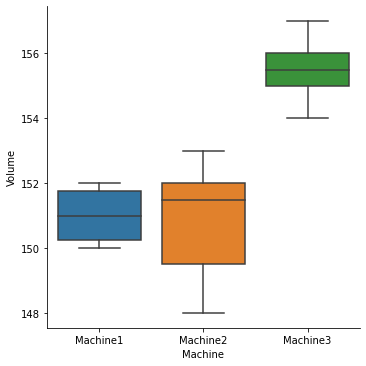

In [26]:
sns.catplot(data=m13, x='Machine', y='Volume', kind='box')

**CONCLUSION:**

- Machine1 & Machine3 : p-adj = 0.001 which is smaller than 0.05 (REJECT H0)
            
            (Which means there is a difference in average Machine1 & Machine3)


- Machine2 & Machine3 : p-adj = 0.001 which is smaller than 0.05 (REJECT H0)

            (Which means there is a difference in average Machine2 & Machine3)